<a href="https://colab.research.google.com/github/YerinS/Yerin_Portfolio/blob/main/DL_RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DL CNN] Rock Paper Scissors 


- 　__Data__ 　　　　　　　rock_paper_scissors dataset<br/>
- 　__Label__ 　 　　　 　　rock, paper, scissors<br/>
- 　__Model Accuracy__　　90.34%<br/>
- 　__Data Source__ 　 　　 TensorFlow Datasets collection<br/>
- 　__DL Framework__ 　 　 Keras<br/>
- 　__Packages__ 　 　 　 　NumPy, Matplotlib, TensorFlow v2.7<br/>
<br/>

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings("ignore")

# 1. Get Data

- Download Rock-Paper-Scissors dataset from TensorFlow Datasets collection

In [2]:
(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name='rock_paper_scissors',
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

In [3]:
dataset_info 

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

In [4]:
print('Number of Train Examples:', dataset_info.splits['train'].num_examples)
print('Number of Test Examples:', dataset_info.splits['test'].num_examples)
print('Number of Label Classes:', dataset_info.features['label'].num_classes)

Number of Train Examples: 2520
Number of Test Examples: 372
Number of Label Classes: 3


In [5]:
input_img_size_original = dataset_info.features['image'].shape[0]
input_img_shape_original = dataset_info.features['image'].shape

input_img_size_reduced = input_img_size_original // 2
input_img_shape_reduced = (
    input_img_size_reduced,
    input_img_size_reduced,
    input_img_shape_original[2]
)

input_img_size = input_img_size_reduced
input_img_shape = input_img_shape_reduced

print('Input image size (original):', input_img_size_original)
print('Input image shape (original):', input_img_shape_original)

print('\nInput image size (reduced):', input_img_size_reduced)
print('Input image shape (reduced):', input_img_shape_reduced)

print('\nInput image size:', input_img_size)
print('Input image shape:', input_img_shape)

Input image size (original): 300
Input image shape (original): (300, 300, 3)

Input image size (reduced): 150
Input image shape (reduced): (150, 150, 3)

Input image size: 150
Input image shape: (150, 150, 3)


In [6]:
get_label_name = dataset_info.features['label'].int2str

print(get_label_name(0))
print(get_label_name(1))
print(get_label_name(2))

rock
paper
scissors


# 2. Clean, Prepare & Manipulate Data

- Explore the dataset

In [7]:
def preview_dataset(dataset):
    plt.figure(figsize=(12, 12))
    plot_index = 0
    for features in dataset.take(12):
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        label = get_label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

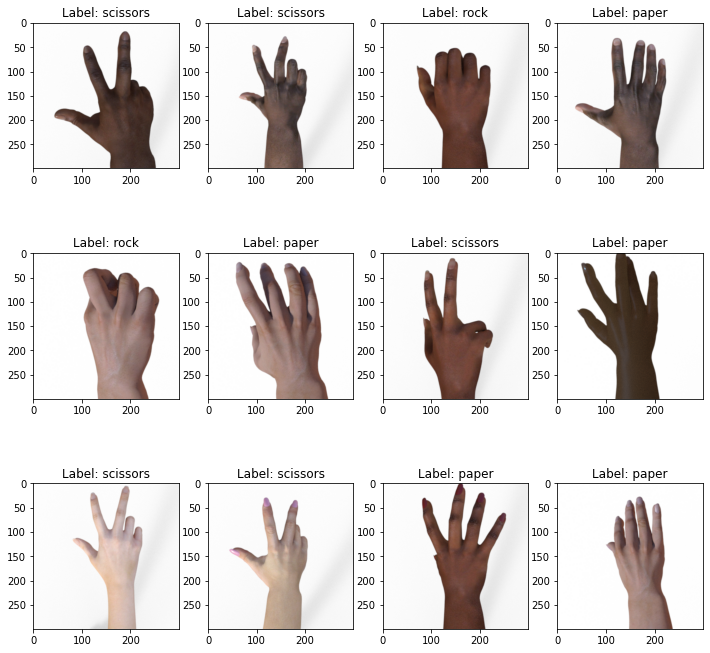

In [8]:
preview_dataset(dataset_train_raw)

In [9]:
(first_image, first_lable) = list(dataset_train_raw.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (300, 300, 3) 

[[[254 254 254]
  [253 253 253]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [250 250 250]]

 [[254 254 254]
  [254 254 254]
  [253 253 253]
  ...
  [250 250 250]
  [251 251 251]
  [249 249 249]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [252 252 252]]

 ...

 [[252 252 252]
  [251 251 251]
  [252 252 252]
  ...
  [247 247 247]
  [249 249 249]
  [248 248 248]]

 [[253 253 253]
  [253 253 253]
  [251 251 251]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[252 252 252]
  [253 253 253]
  [252 252 252]
  ...
  [248 248 248]
  [247 247 247]
  [250 250 250]]]


- Preprocess the dataset

In [10]:
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.
    image = tf.image.resize(image, [input_img_size, input_img_size])
    return image, label

In [11]:
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [12]:
(first_image, first_lable) = list(dataset_train.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image Shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image Shape: (150, 150, 3) 

[[[0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.98039216 0.98039216 0.98039216]]

 [[0.99607843 0.99607843 0.99607843]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.98333335 0.98333335 0.98333335]
  [0.9813726  0.9813726  0.9813726 ]
  [0.98333335 0.98333335 0.98333335]]

 [[0.99607843 0.99607843 0.99607843]
  [0.9941176  0.9941176  0.9941176 ]
  [0.9941176  0.9941176  0.9941176 ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9852941  0.9852941  0.9852941 ]
  [0.9813726  0.9813726  0.9813726 ]]

 ...

 [[0.9862745  0.9862745  0.9862745 ]
  [0.98725486 0.98725486 0.98725486]
  [0.9882353  0.9882353  0.9882353 ]
  ...
  [0.9705882  0.9705882  0.9705882 ]
  [0.97352946 0.97352946 0.97352946]
  [0.9754902  0.9754902  0.9754902 ]]

 [[0.9882353  0.9882353  0.9882353

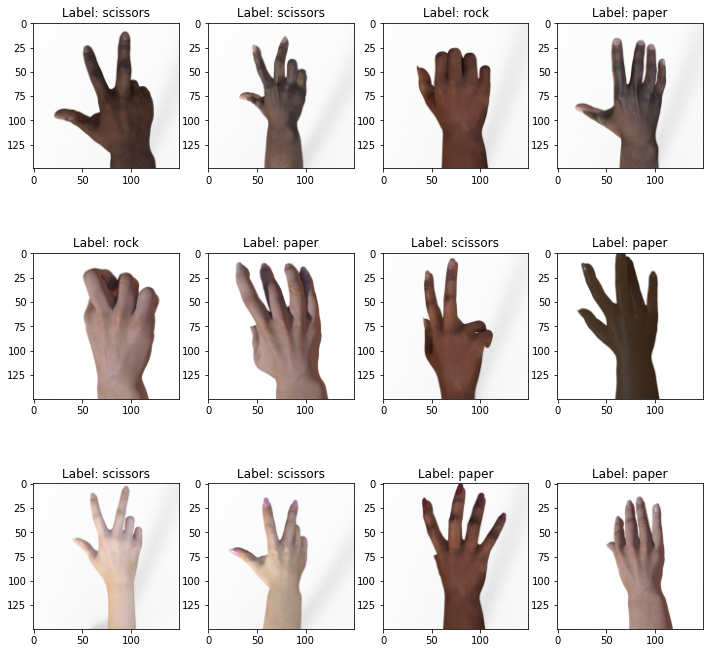

In [13]:
preview_dataset(dataset_train)

- Data shuffling and batching

In [14]:
dataset_train_shuffled = dataset_train.shuffle(
    buffer_size = dataset_info.splits['train'].num_examples
)

dataset_train_shuffled = dataset_train.batch(
    batch_size = 32
)

dataset_train_shuffled = dataset_train_shuffled.prefetch(
    buffer_size = tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(32)

In [15]:
print(dataset_train_shuffled)
print(dataset_test_shuffled)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


Label Batch Shape: (32,) 

Image Batch Shape: (32, 150, 150, 3) 

Label Batch: [2 2 0 1 0 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 1 1 2 2 2 0 0] 

First Batch Image: [[[0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.98039216 0.98039216 0.98039216]]

 [[0.99607843 0.99607843 0.99607843]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.98333335 0.98333335 0.98333335]
  [0.9813726  0.9813726  0.9813726 ]
  [0.98333335 0.98333335 0.98333335]]

 [[0.99607843 0.99607843 0.99607843]
  [0.9941176  0.9941176  0.9941176 ]
  [0.9941176  0.9941176  0.9941176 ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9852941  0.9852941  0.9852941 ]
  [0.9813726  0.9813726  0.9813726 ]]

 ...

 [[0.9862745  0.9862745  0.9862745 ]
  [0.98725486 0.98725486 0.98725486]
  [0.9882353  0.9882353  0.9882353 ]
  ...
  [0.9705882  0.97058

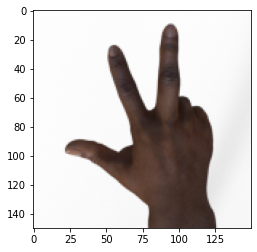

In [16]:
batches = tfds.as_numpy(dataset_train_shuffled)
for batch in batches:
    image_batch, label_batch = batch
    print('Label Batch Shape:', label_batch.shape, '\n')
    print('Image Batch Shape:', image_batch.shape, '\n')
    print('Label Batch:', label_batch, '\n')
    
    for batch_item_index in range(len(image_batch)):
        print('First Batch Image:', image_batch[batch_item_index], '\n')
        plt.imshow(image_batch[batch_item_index])
        plt.show()
        break
    break

# 3. Create Model

- Create neural network model using Keras

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation="relu"),   
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),   
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),  
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),    
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),    
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dense(3, activation="softmax")
])

In [18]:
model.compile(
    optimizer='adam', metrics=['accuracy'],
    loss='sparse_categorical_crossentropy',
)

In [19]:
batch_size = 32

steps_per_epoch = dataset_info.splits['train'].num_examples // batch_size
validation_steps = dataset_info.splits['test'].num_examples // batch_size

print('steps_per_epoch:', steps_per_epoch)
print('validation_steps:', validation_steps)

steps_per_epoch: 78
validation_steps: 11


In [20]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(
    x = dataset_train_shuffled.repeat(),
    validation_data = dataset_test_shuffled.repeat(),
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
78/78 [==============================] - 20s 172ms/step - loss: 0.4748 - accuracy: 0.7616 - val_loss: 0.5870 - val_accuracy: 0.8920
Epoch 2/20
78/78 [==============================] - 10s 121ms/step - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.6440 - val_accuracy: 0.8892
Epoch 3/20
78/78 [==============================] - 10s 124ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 0.8287 - val_accuracy: 0.8892
Epoch 4/20
78/78 [==============================] - 10s 124ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.7112 - val_accuracy: 0.9034
Epoch 5/20
78/78 [==============================] - 10s 125ms/step - loss: 2.6656e-05 - accuracy: 1.0000 - val_loss: 0.7730 - val_accuracy: 0.9006
Epoch 6/20
78/78 [==============================] - 10s 124ms/step - loss: 1.3264e-05 - accuracy: 1.0000 - val_loss: 0.8122 - val_accuracy: 0.8920
Epoch 7/20
78/78 [==============================] - 10s 124ms/step - loss: 8.9682e-06 - accuracy: 1.0000 - val_loss: 0.8441 - val_accu

- Visualize model

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

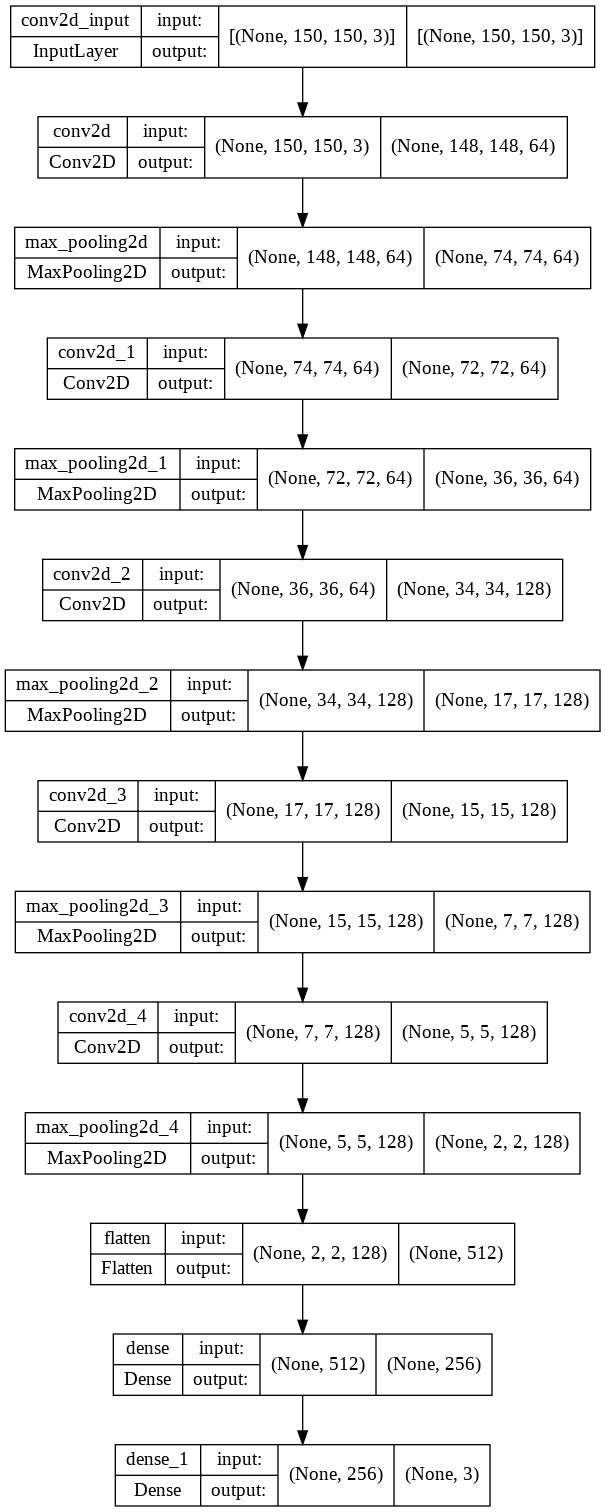

In [22]:
plot_model(model, show_shapes=True, show_layer_names=True,)

# 4. Evaluate Model 

- Visualize accuracy history

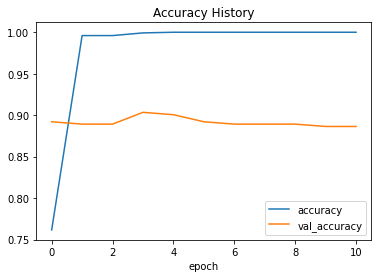

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy History')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()